In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100)

In [2]:
#read in csv & display
wego = pd.read_csv('../data/headway_data_clean.csv')
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,NextDay_Scheduled,NextDay_Actual_Arrival,NextDay_Actual_Departure
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000,0,0,0
350324,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,551,0.000000,0,0,0
350325,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000,0,0,0
350326,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,563,0.000000,0,0,0


In [3]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350328 entries, 0 to 350327
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350328 non-null  int64  
 1   SERVICE_ABBR               350328 non-null  int64  
 2   ADHERENCE_ID               350328 non-null  int64  
 3   DATE                       350328 non-null  object 
 4   ROUTE_ABBR                 350328 non-null  int64  
 5   BLOCK_ABBR                 350328 non-null  int64  
 6   OPERATOR                   350328 non-null  int64  
 7   TRIP_ID                    350328 non-null  int64  
 8   OVERLOAD_ID                350328 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350328 non-null  object 
 10  TIME_POINT_ABBR            350328 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350317 non-null  float64
 12  TRIP_EDGE                  350328 non-null  int64  
 13  LATITUDE                   35

In [4]:
#select relevant rows
wego_stops= wego[['CALENDAR_ID','ROUTE_ABBR','BLOCK_ABBR','TIME_POINT_ABBR','ROUTE_STOP_SEQUENCE','LATITUDE', 'LONGITUDE']]
#round latitude and longitude
wego_stops.loc[:,"LATITUDE"]=np.round(wego_stops["LATITUDE"],3)
wego_stops.loc[:,"LONGITUDE"]=np.round(wego_stops["LONGITUDE"],3)
wego_stops

,CALENDAR_ID,ROUTE_ABBR,BLOCK_ABBR,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE
0,120230801,22,2200,MHSP,14.0,36.181,-86.848
1,120230801,22,2200,ELIZ,10.0,36.193,-86.840
2,120230801,22,2200,CV23,5.0,36.182,-86.814
3,120230801,22,2200,MCC5_10,1.0,36.167,-86.782
4,120230801,22,2200,MCC5_10,1.0,36.167,-86.782
...,...,...,...,...,...,...,...
350323,120230930,7,702,21BK,4.0,36.138,-86.801
350324,120230930,7,702,MCC5_9,3.0,36.167,-86.782
350325,120230930,7,702,MCC5_9,3.0,36.167,-86.782
350326,120230930,7,702,21BK,4.0,36.139,-86.801


In [5]:
print(wego_stops['TIME_POINT_ABBR'].nunique())
sorted(wego_stops['TIME_POINT_ABBR'].unique())

61


['21BK',
 '25ACLARK',
 '28&CHARL',
 'ARTS',
 'BRCJ',
 'CH46',
 'CLFF',
 'CRES',
 'CV23',
 'DCSCC',
 'DKTL',
 'DWMRT',
 'EDBC',
 'ELIZ',
 'GXFIVEPT',
 'GXGRNFLD',
 'GXMADISO',
 'GXRVRGAT',
 'HBHS',
 'HCKP',
 'HDANT',
 'HEAD',
 'HHWM',
 'HLWD',
 'HPKL',
 'HRWB',
 'LINWAL',
 'MCC4_13',
 'MCC4_15',
 'MCC4_18',
 'MCC4_19',
 'MCC4_20',
 'MCC4_22',
 'MCC4_24',
 'MCC5_1',
 'MCC5_10',
 'MCC5_11',
 'MCC5_12',
 'MCC5_2',
 'MCC5_5',
 'MCC5_6',
 'MCC5_7',
 'MCC5_9',
 'MEIG',
 'MHSP',
 'MLKS',
 'MP&R',
 'MXBELL',
 'MXDONEL',
 'MXTHOMP',
 'MXWHARF',
 'N1SP',
 'NVFG',
 'SAMS',
 'THNV',
 'WALM',
 'WE23',
 'WE31',
 'WHBG',
 'WMRT',
 'YGKG']

In [6]:
locations = wego_stops.groupby(["LATITUDE", "LONGITUDE", "TIME_POINT_ABBR"]).size()

locations

LATITUDE  LONGITUDE  TIME_POINT_ABBR
36.049    -86.714    HCKP                4635
36.053    -86.655    HHWM               10194
36.069    -86.934    BRCJ                2132
          -86.933    BRCJ                2048
36.072    -86.636    MXBELL              5108
                                        ...  
36.244    -86.757    DWMRT                245
36.257    -86.714    GXMADISO            9964
36.300    -86.696    GXRVRGAT            9962
36.301    -86.695    GXRVRGAT            4992
36.308    -86.686    SAMS                4992
Length: 80, dtype: int64

That is a little too vague so new approach:
apply lambda to get unique lat/long for each TIME_POINT_ABBR

In [7]:
timepoints = wego_stops.groupby("TIME_POINT_ABBR").apply(lambda x: x[["LATITUDE", "LONGITUDE"]].drop_duplicates())
timepoints["LATITUDE"]=np.round(timepoints["LATITUDE"],3)
timepoints["LONGITUDE"]=np.round(timepoints["LONGITUDE"],3)
timepoints

LATITUDE  LONGITUDE
TIME_POINT_ABBR                           
21BK            2124     36.138    -86.801
                6135     36.139    -86.801
25ACLARK        315      36.186    -86.817
28&CHARL        2130     36.154    -86.818
ARTS            45162    36.131    -86.740
...                         ...        ...
WHBG            1272     36.149    -86.858
                2128     36.150    -86.858
                2135     36.150    -86.859
WMRT            2901     36.082    -86.727
YGKG            42       36.203    -86.841

[80 rows x 2 columns]

Groupby to sort by lat/long and get counts of each TIME_POINT_ABBR

In [8]:
wego_stops["TIME_POINT_ABBR"].value_counts()

TIME_POINT_ABBR
GXRVRGAT    14954
DWMRT       14085
WHBG        11602
MXTHOMP     10384
MXWHARF     10382
            ...  
HEAD           73
MCC4_13        72
MCC5_12        43
MCC5_7         36
CRES           36
Name: count, Length: 61, dtype: int64

use str replace and regex to change all bus stops beginnign with MCC to "MCC"

In [9]:
wego_stops.loc[:,"TIME_POINT_ABBR"] = wego_stops["TIME_POINT_ABBR"].str.replace("^MCC\d+_\d+", "MCC", regex=True)

wego_stops

,CALENDAR_ID,ROUTE_ABBR,BLOCK_ABBR,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE
0,120230801,22,2200,MHSP,14.0,36.181,-86.848
1,120230801,22,2200,ELIZ,10.0,36.193,-86.840
2,120230801,22,2200,CV23,5.0,36.182,-86.814
3,120230801,22,2200,MCC,1.0,36.167,-86.782
4,120230801,22,2200,MCC,1.0,36.167,-86.782
...,...,...,...,...,...,...,...
350323,120230930,7,702,21BK,4.0,36.138,-86.801
350324,120230930,7,702,MCC,3.0,36.167,-86.782
350325,120230930,7,702,MCC,3.0,36.167,-86.782
350326,120230930,7,702,21BK,4.0,36.139,-86.801


Value counts to find busiest bus stops.

In [10]:
stop_counts=wego_stops["TIME_POINT_ABBR"].value_counts().to_frame()
stop_counts

,count
TIME_POINT_ABBR,
MCC,67463
GXRVRGAT,14954
DWMRT,14085
WHBG,11602
MXTHOMP,10384
MXWHARF,10382
HHWM,10194
MXDONEL,10194
MXBELL,10194


In [11]:
wego_stops["TIME_POINT_ABBR"].nunique()

46

drop lat/long and bring in adherence:

In [12]:
wego_stops_adh= wego[['CALENDAR_ID','ROUTE_ABBR','BLOCK_ABBR','TIME_POINT_ABBR','ROUTE_STOP_SEQUENCE','ADHERENCE']]
wego_stops_adh.loc[:,"TIME_POINT_ABBR"] = wego_stops_adh["TIME_POINT_ABBR"].str.replace("^MCC\d+_\d+", "MCC", regex=True)
wego_stops_adh

,CALENDAR_ID,ROUTE_ABBR,BLOCK_ABBR,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,ADHERENCE
0,120230801,22,2200,MHSP,14.0,-2.133333
1,120230801,22,2200,ELIZ,10.0,-2.450000
2,120230801,22,2200,CV23,5.0,-0.933333
3,120230801,22,2200,MCC,1.0,6.283333
4,120230801,22,2200,MCC,1.0,-1.583333
...,...,...,...,...,...,...
350323,120230930,7,702,21BK,4.0,-8.433333
350324,120230930,7,702,MCC,3.0,-11.300000
350325,120230930,7,702,MCC,3.0,-4.316666
350326,120230930,7,702,21BK,4.0,-22.083333


In [13]:
avg_adh=wego_stops_adh.groupby("TIME_POINT_ABBR")["ADHERENCE"].mean().sort_values()
avg_adh

TIME_POINT_ABBR
DCSCC      -7.091481
MXDONEL    -5.675430
MXBELL     -5.521317
MXWHARF    -5.335053
SAMS       -4.919132
HDANT      -4.633313
MXTHOMP    -4.362459
HHWM       -4.271982
THNV       -4.256756
ARTS       -4.233489
LINWAL     -4.226418
EDBC       -4.195391
21BK       -4.180070
HRWB       -4.015773
WE31       -3.945215
WE23       -3.929729
BRCJ       -3.864808
NVFG       -3.748838
WMRT       -3.715836
YGKG       -3.588174
WHBG       -3.586182
HPKL       -3.325840
HBHS       -3.264319
HCKP       -3.253180
MP&R       -3.231467
GXGRNFLD   -3.023283
GXFIVEPT   -2.962911
HLWD       -2.930651
28&CHARL   -2.838419
CH46       -2.836583
GXRVRGAT   -2.793618
ELIZ       -2.786051
GXMADISO   -2.699881
CLFF       -2.209389
CV23       -2.050184
DWMRT      -2.048339
MCC        -2.010634
CRES       -1.957292
MEIG       -1.956604
DKTL       -1.899642
N1SP       -1.735685
MHSP       -1.547369
WALM       -1.422592
MLKS       -1.290633
HEAD        1.013657
25ACLARK    1.458553
Name: ADHERENCE, d

In [14]:
traffic_adf_corr=pd.merge(stop_counts, avg_adh, how='outer', on='TIME_POINT_ABBR')
traffic_adf_corr

,count,ADHERENCE
TIME_POINT_ABBR,,
MCC,67463,-2.010634
GXRVRGAT,14954,-2.793618
DWMRT,14085,-2.048339
WHBG,11602,-3.586182
MXTHOMP,10384,-4.362459
MXWHARF,10382,-5.335053
HHWM,10194,-4.271982
MXDONEL,10194,-5.675430
MXBELL,10194,-5.521317


C:\Users\briga\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\briga\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


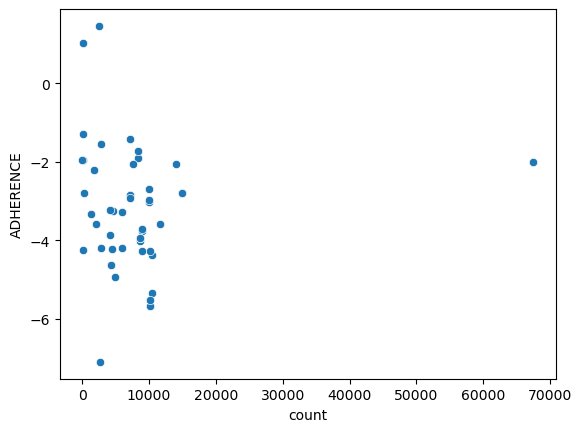

In [15]:
sns.scatterplot(data=traffic_adf_corr, 
                x='count', 
                y='ADHERENCE');

doesn't look like much correlation between amount of traffic at stops and adherence

lets look at route adherence:

In [16]:
route_adh=wego_stops_adh.groupby("ROUTE_ABBR")["ADHERENCE"].mean().sort_values().to_frame()
route_adh

,ADHERENCE
ROUTE_ABBR,
55,-4.823302
52,-3.971342
3,-3.761491
7,-3.346555
56,-2.703988
50,-2.505022
23,-1.760110
22,-1.138007


In [17]:
wego_stops_adh.groupby("ROUTE_ABBR")["ROUTE_STOP_SEQUENCE"].max().sort_values()

ROUTE_ABBR
7      5.0
3      8.0
23     8.0
55    11.0
52    12.0
56    13.0
22    14.0
50    17.0
Name: ROUTE_STOP_SEQUENCE, dtype: float64

In [19]:
wego_stops_adh.groupby("ROUTE_ABBR")["ROUTE_STOP_SEQUENCE"].nunique().sort_values()

ROUTE_ABBR
7      5
3      7
23     7
55    10
52    11
56    11
22    13
50    14
Name: ROUTE_STOP_SEQUENCE, dtype: int64

In [26]:
route_stops=wego_stops_adh.groupby("ROUTE_ABBR")["ROUTE_STOP_SEQUENCE"].max().sort_values().to_frame()
route_stops

,ROUTE_STOP_SEQUENCE
ROUTE_ABBR,
7,5.0
3,8.0
23,8.0
55,11.0
52,12.0
56,13.0
22,14.0
50,17.0


C:\Users\briga\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\briga\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


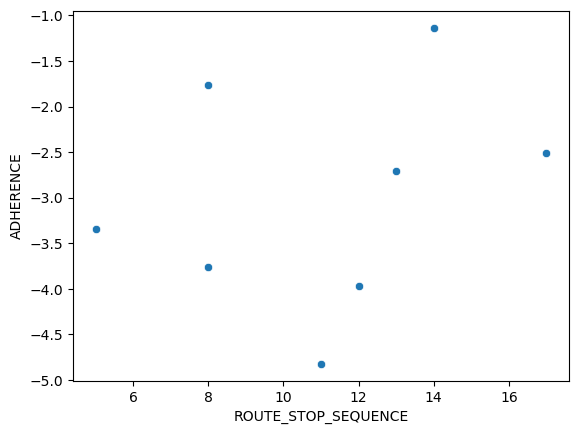

In [23]:
sns.scatterplot( x=route_stops['ROUTE_STOP_SEQUENCE'], 
                y=route_adh['ADHERENCE']);